# IBM EDA Peer-graded Assignment

## Data Dictionary 

Education:
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor'

Environment_Satisfaction:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

Job_Involvement:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

Job_Satisfaction:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

Performance_Rating:
1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding'

Relationship_Satisfaction:
1 'Low',
2 'Medium',
3 'High',
4 'Very High'

Work_Life_Balance:
1 'Bad',
2 'Good',
3 'Better',
4 'Best'

Distance_From_Home: Measured in Kilometers

Stock_Option_Level: Job_Level Scale

Job_Level: 1 - 5 scale

Percent_Salary_Hike: Percentage increase compared to the previous year

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IBM_HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* Brief description of the data set and a summary of its attributes

    - 

* Initial plan for data exploration

    - Check for missing data, NULLS
    - Review columns to identify if needed or not
    - Review column names and understand what each label means
    - Make plots for initial insights

* Actions taken for data cleaning and feature engineering

    - Review target variable against other features (attrition vs x)
    - Clean column names, create plots
    - plot against attrition:
        Age, Department, Education, Gender, Performance Rating, Job Satisfaction, Hourly_Rate, Work_Life_Balance
    
    - Remove column: 
        over18, Employee_Count, Standard_Hours

* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

* Formulating at least 3 hypothesis about this data

* Conducting a formal significance test for one of the hypotheses and discuss the results

* Suggestions for next steps in analyzing this data

* A paragraph that summarizes the quality of this data set and a request for additional data if needed

In [4]:
clean_df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
clean_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [5]:
header = ['Age', 'Attrition', 'Business_Travel', 'Daily_Rate',
         'Department', 'Distance_From_Home', 'Education', 'Education_Field',
         'Environment_Satisfaction', 'Gender', 
         'Hourly_Rate', 'Job_Involvement', 'Job_Level', 'Job_Role', 
         'Job_Satisfaction', 'Marital_Status', 'Monthly_Income',
         'Monthly_Rate', 'Num_Companies_Worked', 'Overtime', 
         'Percent_Salary_Hike', 'Performance_Rating', 'Relationship_Satisfaction', 
          'Stock_Option_Level','Total_Working_Years', 
          'Training_Times_Last_Year', 'Work_Life_Balance', 'Years_At_Company',
         'Years_In_Current_Role', 'Years_Since_Last_Promotion', 
         'Years_With_Currrent_Manager']

In [6]:
clean_df.columns = header

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1470 non-null   int64 
 1   Attrition                    1470 non-null   object
 2   Business_Travel              1470 non-null   object
 3   Daily_Rate                   1470 non-null   int64 
 4   Department                   1470 non-null   object
 5   Distance_From_Home           1470 non-null   int64 
 6   Education                    1470 non-null   int64 
 7   Education_Field              1470 non-null   object
 8   Environment_Satisfaction     1470 non-null   int64 
 9   Gender                       1470 non-null   object
 10  Hourly_Rate                  1470 non-null   int64 
 11  Job_Involvement              1470 non-null   int64 
 12  Job_Level                    1470 non-null   int64 
 13  Job_Role                     1470

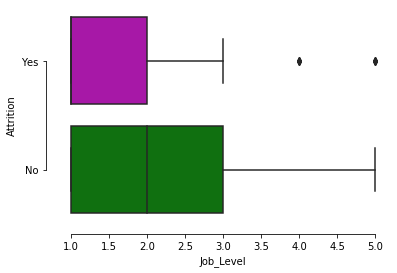

In [8]:
sns.boxplot(x="Job_Level", y="Attrition",
            palette=["m", "g"],
            data=clean_df)
sns.despine(offset=10, trim=True)

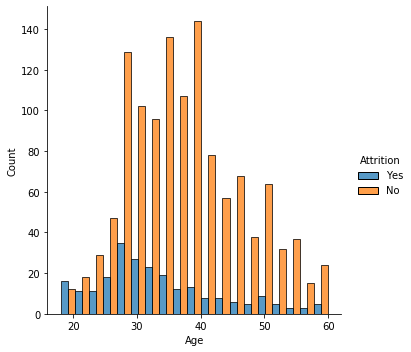

In [18]:
sns.displot(clean_df, x="Age", hue='Attrition', multiple='dodge')

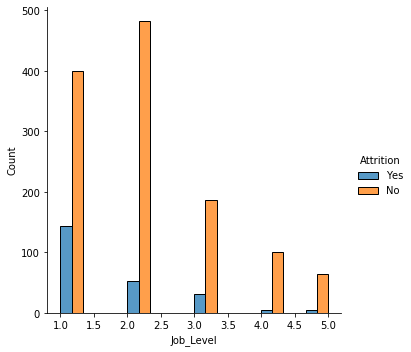

In [20]:
sns.displot(clean_df, x="Job_Level", hue='Attrition', multiple='dodge')

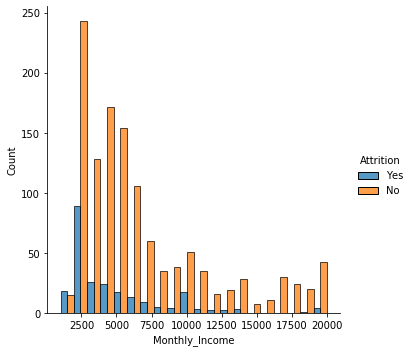

In [21]:
sns.displot(clean_df, x="Monthly_Income", hue='Attrition', multiple='dodge')

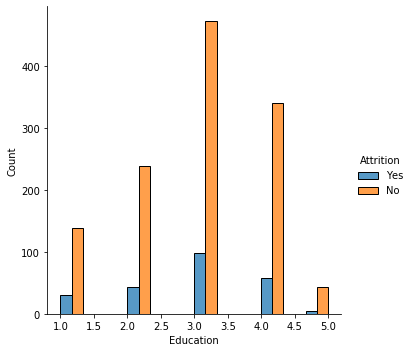

In [22]:
sns.displot(clean_df, x="Education", hue='Attrition', multiple='dodge')

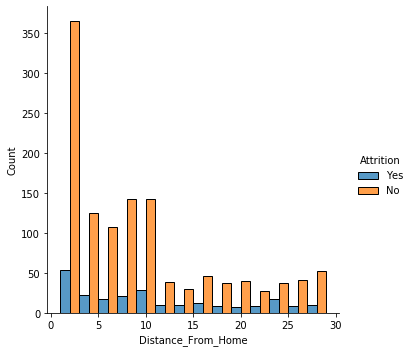

In [23]:
sns.displot(clean_df, x="Distance_From_Home", hue='Attrition', multiple='dodge')

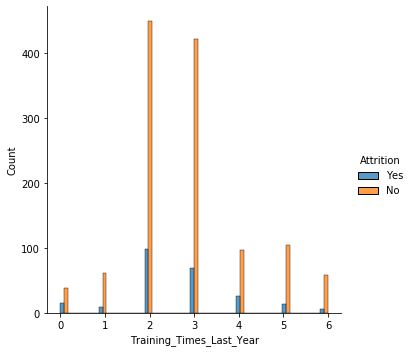

In [25]:
sns.displot(clean_df, x="Training_Times_Last_Year", hue='Attrition', multiple='dodge')

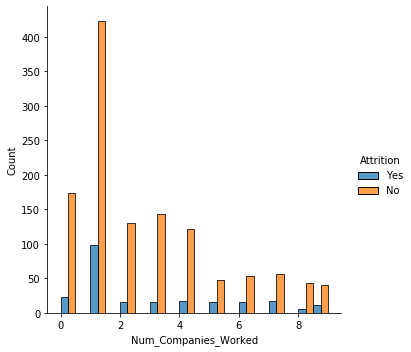

In [26]:
sns.displot(clean_df, x="Num_Companies_Worked", hue='Attrition', multiple='dodge')

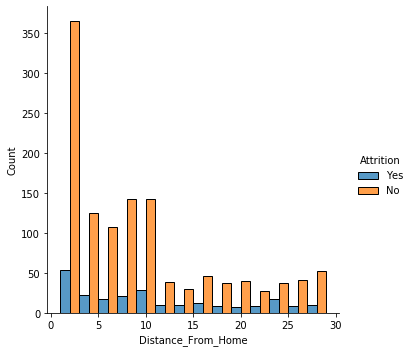

In [27]:
sns.displot(clean_df, x="Distance_From_Home", hue='Attrition', multiple='dodge')